## Observations and Insights 

* The Analysis shows that Capomulin is a drug regimen that is good for treating tumor growth.
* Infubinol has a potential outlier among the drug regimen.
* There is a positive correlation between the between the weight of mouse and the tumor volume.

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata, study_results, how = 'left', on = 'Mouse ID')

#show data table
mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [75]:
# Checking the number of mice in the DataFrame.
mouse_data_complete['Mouse ID'].nunique()

249

In [76]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_df = mouse_data_complete[mouse_data_complete.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [77]:
# Optional: Get all the data for the duplicate mouse ID. 

In [78]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_df = mouse_data_complete.drop_duplicates(['Mouse ID', 'Timepoint'], keep = 'last')
#clean_mouse_df =mouse_data_complete[mouse_data_complete['Mouse ID'].isin(duplicate_df)==False]
#clean_mouse_df = cleaned_mouse_df[cleaned_mouse_df.duplicated(['Mouse ID', 'Timepoint'])]

In [79]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_df['Mouse ID'].nunique()


249

## Summary Statistics

In [80]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean = cleaned_mouse_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = cleaned_mouse_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = cleaned_mouse_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standard_dev = cleaned_mouse_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = cleaned_mouse_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']



In [81]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and Sem of the tumor volume for each regimen
summary_stats_df = pd.DataFrame({'Mean':mean,
             'Median':median,
             'Variance':variance,
             'Standard Deviation':standard_dev,
             'SEM':sems})
summary_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

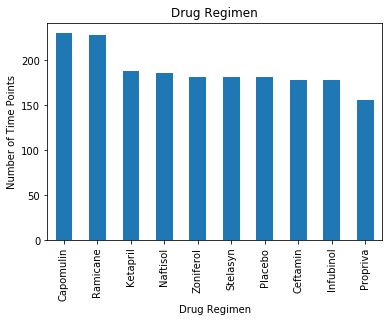

In [82]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
counts = cleaned_mouse_df['Drug Regimen'].value_counts()

#plot bar using pandas DataFrfame.plot
counts.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Time Points')
plt.title('Drug Regimen')
plt.show()


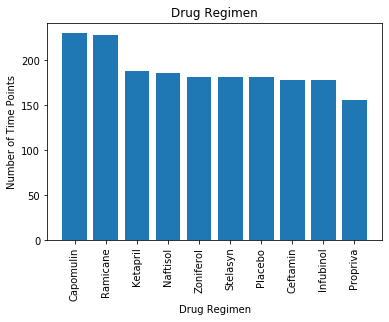

In [83]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#plot bar using pyplot 

counts = cleaned_mouse_df['Drug Regimen'].value_counts()

plt.bar(counts.index,counts.values)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Time Points')
plt.title('Drug Regimen')
plt.show()


## Pie Plots

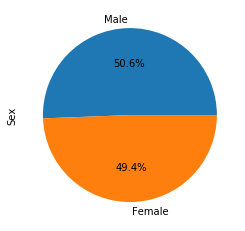

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts = mouse_data_complete.Sex.value_counts()
counts.plot(kind='pie',autopct = '%1.1f%%')


Text(0, 0.5, 'Sex')

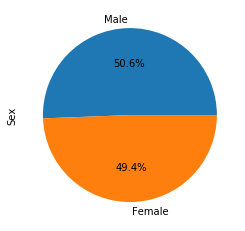

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = mouse_data_complete.Sex.value_counts()
labels = ['Male', 'Female']
plt.pie(counts.values,labels = counts.index, autopct = '%1.1f%%')
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [86]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#maximum point of each mouse
max_tumor_volume = cleaned_mouse_df.groupby(['Mouse ID']).max()
#set Mouse ID as index
max_tumor_volume = max_tumor_volume.reset_index()
#merge the new tumor df with the cleaned df
tumor_merged_data = max_tumor_volume[['Mouse ID','Timepoint']].merge(cleaned_mouse_df,on = ['Mouse ID','Timepoint'])
tumor_merged_data.head()



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [87]:
#check or get the four most promising treatment regimen from previous bar graphs

#calculating the IQR, outliers and quatiles for ramicane

ramicane = tumor_merged_data.loc[tumor_merged_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']

ramicane_quartiles = ramicane.quantile([.25,.5,.75])
ramicane_q1 = ramicane_quartiles[0.25]
ramicane_q3 = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_q3 - ramicane_q1
ramicane_lower_bound = ramicane_q1 -(1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_q3 +(1.5*ramicane_iqr)
print(f'the lower quartile of ramicane is: {ramicane_q1}')
print(f'the upper quartile of ramicane is: {ramicane_q3}')
print(f'the interquartile range of ramicane is: {ramicane_iqr}')
print(f'values below {ramicane_lower_bound} could be outliers.')
print(f'values above {ramicane_upper_bound} could be outliers.')



the lower quartile of ramicane is: 31.56046955
the upper quartile of ramicane is: 40.65900627
the interquartile range of ramicane is: 9.098536719999998
values below 17.912664470000003 could be outliers.
values above 54.30681135 could be outliers.


In [88]:
#calculating the IQR, outliers and quatiles for caftamin

Ceftamin = tumor_merged_data.loc[tumor_merged_data['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

Ceftamin_quartiles = Ceftamin.quantile([.25,.5,.75])
Ceftamin_q1 = Ceftamin_quartiles[0.25]
Ceftamin_q3 = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_q3 - Ceftamin_q1
Ceftamin_lower_bound = Ceftamin_q1 -(1.5*Ceftamin_iqr)
Ceftamin_upper_bound = Ceftamin_q3 +(1.5*Ceftamin_iqr)
print(f'the lower quartile of Ceftamin is: {Ceftamin_q1}')
print(f'the upper quartile of Ceftamin is: {Ceftamin_q3}')
print(f'the interquartile range of Ceftamin is: {Ceftamin_iqr}')
print(f'values below {Ceftamin_lower_bound} could be outliers.')
print(f'values above {Ceftamin_upper_bound} could be outliers.')


the lower quartile of Ceftamin is: 48.72207785
the upper quartile of Ceftamin is: 64.29983003
the interquartile range of Ceftamin is: 15.577752179999997
values below 25.355449580000002 could be outliers.
values above 87.66645829999999 could be outliers.


In [89]:
#calculating the IQR, outliers and quatiles for Infubinol

Infubinol = tumor_merged_data.loc[tumor_merged_data['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']

Infubinol_quartiles = Infubinol.quantile([.25,.5,.75])
Infubinol_q1 = Infubinol_quartiles[0.25]
Infubinol_q3 = Infubinol_quartiles[0.75]
Infubinol_iqr = Infubinol_q3 - Infubinol_q1
Infubinol_lower_bound = Infubinol_q1 -(1.5*Infubinol_iqr)
Infubinol_upper_bound = Infubinol_q3 +(1.5*Infubinol_iqr)
print(f'the lower quartile of Infubinol is: {Infubinol_q1}')
print(f'the upper quartile of Infubinol is: {Infubinol_q3}')
print(f'the interquartile range of Infubinol is: {Infubinol_iqr}')
print(f'values below {Infubinol_lower_bound} could be outliers.')
print(f'values above {Infubinol_upper_bound} could be outliers.')


the lower quartile of Infubinol is: 54.04860769
the upper quartile of Infubinol is: 65.52574285
the interquartile range of Infubinol is: 11.477135160000003
values below 36.83290494999999 could be outliers.
values above 82.74144559000001 could be outliers.


In [90]:
#calculating the IQR, outliers and quatiles for capomulin

capomulin = tumor_merged_data.loc[tumor_merged_data['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']

capomulin_quartiles = capomulin.quantile([.25,.5,.75])
capomulin_quartiles = capomulin.quantile([.25,.5,.75])
capomulin_q1 = capomulin_quartiles[0.25]
capomulin_q3 = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_q3 - capomulin_q1
capomulin_lower_bound = capomulin_q1 -(1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_q3 +(1.5*capomulin_iqr)
print(f'the lower quartile of capomulin is: {capomulin_q1}')
print(f'the upper quartile of capomulin is: {capomulin_q3}')
print(f'the interquartile range of capomulin is: {capomulin_iqr}')
print(f'values below {capomulin_lower_bound} could be outliers.')
print(f'values above {capomulin_upper_bound} could be outliers.')


the lower quartile of capomulin is: 32.37735684
the upper quartile of capomulin is: 40.1592203
the interquartile range of capomulin is: 7.781863460000004
values below 20.70456164999999 could be outliers.
values above 51.83201549 could be outliers.


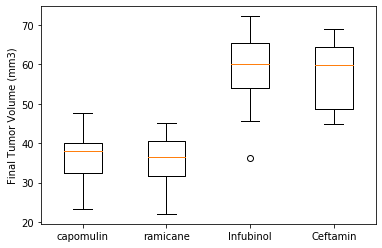

In [67]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#fig, axl = plt.subplots(figsize=(6,6),)

plt.boxplot([capomulin,ramicane,Infubinol,Ceftamin],labels=['capomulin','ramicane','Infubinol','Ceftamin'])
#set y_axis label
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

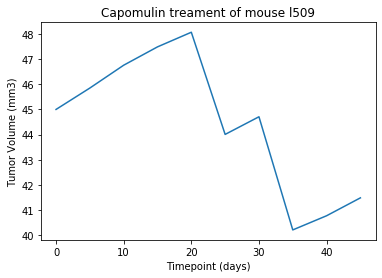

In [68]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#using mouse ID 1509
#Capomulin_plot = mouse_data_complete.loc[mouse_data_complete['Drug Regimen'] == 'Capomulin']
#tumor_merged_data['Mouse ID'] = tumor_merged_data['Mouse ID'].str()
mouse_l509 = cleaned_mouse_df.loc[cleaned_mouse_df['Mouse ID'] == 'l509']

#fig, ax1 = plt.subplots(figsize=(8,6))
plt.plot(mouse_l509['Timepoint'], mouse_l509['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.title('Capomulin treament of mouse l509')
plt.show()


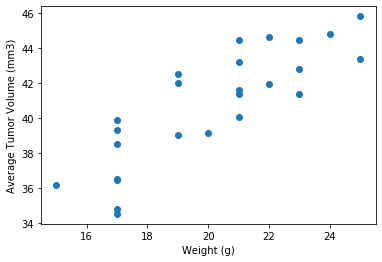

In [91]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Capomulin = cleaned_mouse_df[cleaned_mouse_df['Drug Regimen'] == 'Capomulin']
scatter_ave = Capomulin.groupby(['Mouse ID']).mean()
plt.scatter(scatter_ave['Weight (g)'],scatter_ave['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between the weight and tumor volume is 0.8419363424694716
LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.12754359033201337)


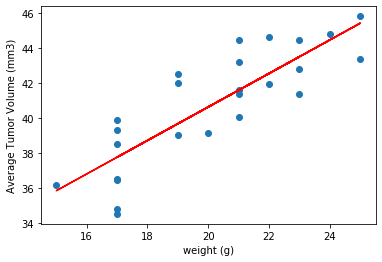

In [93]:
# Calculate the correlation coefficient and linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen


correlation = st.pearsonr(scatter_ave['Weight (g)'],scatter_ave['Tumor Volume (mm3)'])[0]
print(f'The correlation between the weight and tumor volume is {correlation}')
line_regression = st.linregress(scatter_ave['Weight (g)'],scatter_ave['Tumor Volume (mm3)'])
print(line_regression)
graph_line = scatter_ave['Weight (g)']*line_regression[0]+line_regression[1]
plt.scatter(scatter_ave['Weight (g)'],scatter_ave['Tumor Volume (mm3)'])
plt.plot(scatter_ave['Weight (g)'],graph_line,color = 'red')
plt.xlabel('weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()